# Newton's method with automatic differentiation

In the following demo, we illustrate an example application of the `gradpy` package to determine the roots of a vector-valued, multivariate function using Newton's method.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gradpy.autodiff import Var, Array

We begin by initializing a vector-valued, multivariate function

$$
\vec{f}(x,y) = \left[\begin{array}{ll}
\left(x^2+y^2-1\right)^3-x^2y^3 \\
\dfrac{9}{4} x^2-\left(y-\dfrac{1}{2}\right)^2-2
\end{array}
\right]
$$

as an `Array` object, defined in terms of `Var` variables $x$ and $y$. The zero contours of the individual components of $\vec{f}$ and their intersections, which correspond to the solutions  $\vec{f}(x,y)=\mathbf{0}$, are plotted for reference. Analytically we can determine the four intersection points to be

$$
(x,y) = \left\{(-1,1), (1,1), (1,0), (-1,0)\right\}
$$

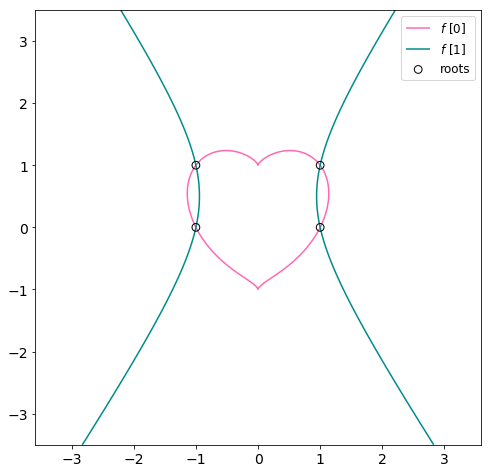

In [3]:
x = Var()
y = Var()
f = Array([(x**2 + y**2 - 1)**3 - x**2 * y**3, # heart-shaped contour
            9./4.*x**2 - (y - 0.5)**2 - 2])    # hyperbola

def plot_f(ax):
    # Plot the components and true zeros of f. Each component of f delineates a contour,
    # and their intersections define the zeros of f.
    xp, yp = np.meshgrid(np.arange(-3.5,3.51,0.01),np.arange(-3.5,3.51,0.01))
    xz = [-1,1,1,-1]
    yz = [1,1,0,0]
    cs1 = ax.contour(xp,yp,(xp**2+yp**2-1)**3-xp**2*yp**3,levels=[0],colors='hotpink')
    cs1.collections[0].set_label('$f$ [0]')
    cs2 = ax.contour(xp,yp,9./4.*xp**2-(yp-0.5)**2-2,levels=[0],colors='darkcyan')
    cs2.collections[0].set_label('$f$ [1]')
    ax.scatter(xz,yz,color='none',edgecolor='k',s=60,zorder=5,label='roots')

    ax.tick_params(labelsize=14)
    ax.legend(fontsize=12)
    ax.axis('equal')
    
fig, ax = plt.subplots(1,1,figsize=(8,8))
plot_f(ax)
plt.show()

Now we apply Newton's method to numerically determine the roots of $\vec{f}(x,y)$; that is, the solutions to $\vec{f}(x,y)=\mathbf{0}$. Our implementation of a multivariate Newton's method which handles `autodiff` objects can be found in the supplementary module `newton_multivar.py`. A simple example use of `newton_multivar` is:

``` Python
root, res, Niter, traj = newton_multivar(f, [x,y], [-3.,2.], tol=1e-12, maxiter=100000)
```

The input arguments are the `autodiff Operation` or `Array` object f whose roots we seek, a list of independent `Var` variables [x,y], an initial guess for each variable (here [-3.,2.]), and optional settings for the desired tolerance on the 2-norm of the residual and maximum number of iterations. Returned are the roots, residual, number of iterations, and the complete trajectory of values taken by each independent variable through the Newton's iterations.

We test four different initial points to locate each of the four roots, and plot the trajectories taken by successive Newton's method iterations in locating each root.

Initial guess: [-3.0, 2.0]
----------------------
Converged to root: [-1.0, 1.0]
2-norm of residual: 3.025026694190274e-13
Number of iterations: 12


Initial guess: [3.0, 2.0]
----------------------
Converged to root: [1.0, 1.0]
2-norm of residual: 3.025026694190274e-13
Number of iterations: 12


Initial guess: [3.0, -2.0]
----------------------
Converged to root: [1.00000038, -1.7e-06]
2-norm of residual: 6.397105068111509e-13
Number of iterations: 40


Initial guess: [-3.0, -2.0]
----------------------
Converged to root: [-1.00000038, -1.7e-06]
2-norm of residual: 6.397105068111509e-13
Number of iterations: 40




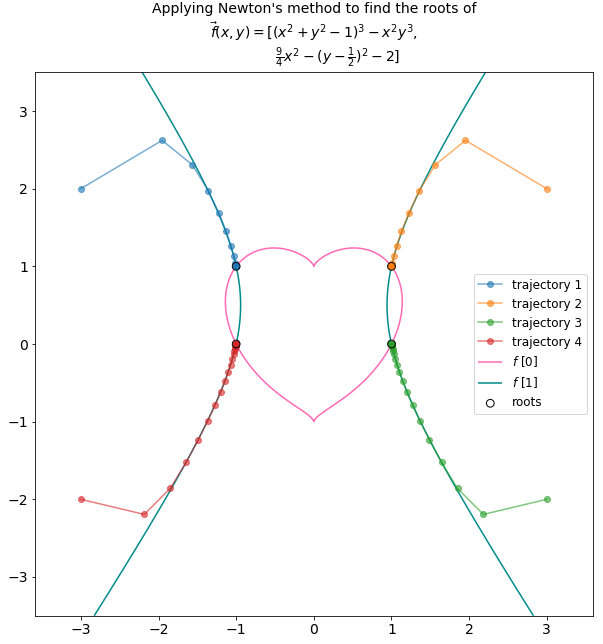

In [4]:
from newton_multivar import newton_multivar

fig, ax = plt.subplots(1,1,figsize=(10,10))
# test four different initial points to locate each of 4 roots.
g1 = [-3.,2.]
g2 = [3.,2.]
g3 = [3.,-2.]
g4 = [-3.,-2.]
for i,g in enumerate([g1,g2,g3,g4]):
    print("Initial guess:",g)
    print("----------------------")
    root, res, Niter, traj = newton_multivar(f,[x,y],g)
    print("Converged to root:",[float('%.8f'%r) for r in root])
    print("2-norm of residual:",res)
    print("Number of iterations:",Niter)
    print("\n")
    ax.plot(traj[:,0],traj[:,1],'o-',label='trajectory '+str(i+1),alpha=0.6)

plot_f(ax)
ax.set_title("Applying Newton's method to find the roots of\n"+
    "$\\vec{f}(x,y)=[(x^2+y^2-1)^3-x^2y^3$,\n"+
    "           $\\frac{9}{4}x^2-(y-\\frac{1}{2})^2-2]$",size=14)
plt.show()